## Introductory Machine Learning: Assignment 4

**Deadline:**

Assignment 4 is due Thursday, November 10 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/9209/discussion/). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Language models
2. Work embeddings

### Problem 1: Gutenberg Books Language Models (15 points)

For this problem you will process books from the [Project Gutenberg](https://www.gutenberg.org/) site which is a public respository of large numbers of books that are in the public domain. You'll build *character-based* (as opposed to word-based) language models on one book, and predict the letters of the other book using the model.


In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

The following helper function `read_url` reads in the text at the given url, and then uses some
[regular expressions](https://www.w3schools.com/python/python_regex.asp) to process the book, removing
everything but the letters a-z, space and period.

In [ ]:
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

def process_text(text):
    text = re.sub('[^a-zA-z .]', '', text.lower())
    return re.sub('[\[\]\_]', '', text)

<img src="https://www.gutenberg.org/cache/epub/76/pg76.cover.medium.jpg" width="110" align="top">

The online book for "Adventures of Huckleberry Finn," by Mark Twain, is [here](https://www.gutenberg.org/ebooks/76).
From this web site you can see various metadata for the book as well as the [link the text itself](https://www.gutenberg.org/files/76/76-0.txt), which is [https://www.gutenberg.org/files/76/76-0.txt](https://www.gutenberg.org/files/76/76-0.txt)

The book for Mark Twain's "A Connecticut Yankee in King Arthur's Court" is [here](https://www.gutenberg.org/ebooks/86).
In the following cell we read in both of these books, and remove all characters except a-z, space, and period.

In [ ]:
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text_raw = read_url(huck_finn_url)
huck_finn_text = process_text(huck_finn_text_raw)

ct_yankee_url = 'https://www.gutenberg.org/files/86/86-0.txt'
ct_yankee_text_raw = read_url(ct_yankee_url)
ct_yankee_text = process_text(ct_yankee_text_raw)


In [ ]:
print("\nSample of raw text:\n")
print(huck_finn_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(huck_finn_text[10000:11000])


Sample of raw text:

my old rags and my sugar-hogshead again, and was free and satisfied. But Tom Sawyer he hunted me up and said he was going to start a band of robbers, and I might join if I would go back to the widow and be respectable. So I went back. The widow she cried over me, and called me a poor lost lamb, and she called me a lot of other names, too, but she never meant no harm by it. She put me in them new clothes again, and I couldn't do nothing but sweat and sweat, and feel all cramped up. Well, then, the old thing commenced again. The widow rung a bell for supper, and you had to come to time. When you got to the table you couldn't go right to eating, but you had to wait for the widow to tuck down her head and grumble a little over the victuals, though there warn't really anything the matter with them,--that is, nothing only everything was cooked by itself. In a barrel of odds and ends it is different; things get mixed up, and the juice kind of swaps around, and the things

<img src="https://www.gutenberg.org/cache/epub/1342/pg1342.cover.medium.jpg" width="110" align="top">


The online book for "Pride and Prejudice", by Jane Austen, is [here](https://www.gutenberg.org/ebooks/1342).
And [here](https://www.gutenberg.org/ebooks/158) is the online book for Jane Austen's "Emma".  In the following cell we read in both of these books, and remove all characters except a-z, space, and period.



In [ ]:
pride_and_prejudice_url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
pride_and_prejudice_text_raw = read_url(pride_and_prejudice_url)
pride_and_prejudice_text = process_text(pride_and_prejudice_text_raw)


emma_url = 'https://www.gutenberg.org/files/158/158-0.txt'
emma_text_raw = read_url(emma_url)
emma_text = process_text(emma_text_raw)

In [ ]:
print("\nSample of raw text:\n")
print(emma_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(emma_text[10000:11000])


Sample of raw text:

 we all are.” Emma spared no exertions to maintain this happier flow of ideas, and hoped, by the help of backgammon, to get her father tolerably through the evening, and be attacked by no regrets but her own. The backgammon-table was placed; but a visitor immediately afterwards walked in and made it unnecessary. Mr. Knightley, a sensible man about seven or eight-and-thirty, was not only a very old and intimate friend of the family, but particularly connected with it, as the elder brother of Isabella’s husband. He lived about a mile from Highbury, was a frequent visitor, and always welcome, and at this time more welcome than usual, as coming directly from their mutual connexions in London. He had returned to a late dinner, after some days’ absence, and now walked up to Hartfield to say that all were well in Brunswick Square. It was a happy circumstance, and animated Mr. Woodhouse for some time. Mr. Knightley had a cheerful manner, which always did him good; and his

The following cell defines some helper code. You should just run this cell; do not change any of the code.

The first function, `ngrams`, takes some input text and a value of `n`. The function then
iterates over the string and counts the number of occurrences of each substring of `n` characters. This is done with the very handy `Counter` class.

We then define a class `language_model` that is a 4-gram character-based language model. The probability of the "next character" is computed using linear interpolation, as described in class.  A weight is assigned to unigrams, bigrams, trigrams, and four-grams (quadgrams?). The bigram probability that, for example, the letter `t` follows the letter `h` is the count of the bigram `ht` divided by the count of the unigram `h`. We add a little bit (1e-10) to the denominator to avoid dividing by zero.

We return the logarithm of the probability, because this will be convenient when computing perplexities.


In [ ]:
def ngrams(text, n=2):
    return Counter([text[(i-n):i] for i in np.arange(n, len(text)+1)])

class language_model:

    def __init__(self, text):
        self.one = ngrams(text, 1)
        self.two = ngrams(text, 2)
        self.three = ngrams(text, 3)
        self.four = ngrams(text, 4)
        self.weight = [0.1, 0.2, 0.3, 0.4]

    def set_weights(self, weights):
        self.weight = weights / np.sum(weights)

    def log_probability(self, gram):
        numer = [self.one[gram[3:]], self.two[gram[2:]], self.three[gram[1:]], self.four[gram[0:]]]
        denom = [sum(self.one[g] for g in self.one), self.one[gram[2:3]], self.two[gram[1:3]], self.three[gram[0:3]]]
        prob = 0
        for i in np.arange(4):
            prob += self.weight[i] * numer[i] / (denom[i]+1e-10)
        return np.log(prob)



### Problem 1.1

Just to be sure we understand what a character-based language model is, let's write an expression
for the probability in an example. Suppose the language model assigns
weight $w_1 = 0.1$ to the unigram model, weight $w_2 = 0.2$ to the bigram model, weight $w_3 = 0.3$ to the trigram model, and weight $w_4 = .4$ to the four-gram model. Note that we must have $w_1+w_2+w_3+w_4 = 1$.

Write an expression for the probability $p(\mbox{z} \,|\, \mbox{qui})$ that the letter $\mbox{z}$ follows the three letters $\mbox{qui}$. Assume that the unigram, bigram, trigram, and four-gram components are given by ratios of
counts in the training data, as in the code above. For example, the bigram probability would be written as

$$ \frac{\mbox{count}(iz)}{\mbox{count}(i)}$$


`0.4*count(quiz)/count(qui) + 0.3*count(uiz)/count(ui) + 0.2*count(iz)/count(i) + 0.1*count(z)`

Now, the cell below constructs two language models, one on the text of Jane Austen's "Emma", the other on
the text of Mark Twain's "Huckleberry Finn".

In [ ]:
emma_lm = language_model(emma_text)
huck_finn_lm = language_model(huck_finn_text)

### Problem 1.2

In this sub-problem, your job is to write a function that takes a language model `lm`, and a text string `text`, and computes the perplexity of the language model on the text.

Hints:
* Your function can ignore the first three characters of the text. Thus, you can begin predicting the fourth character from the first three.
* Either extract the sequence of 4-character substrings, or make a call to `ngrams(text, n=4)` to get a set of 4-grams and their counts on the text.
* Compute the logarithm of probability of the text. If you compute the probability, you will get a very tiny number and numerical "underflow".
* Use the function `lm.log_probability` where `lm` is a instance of the class `language_model`. For example, `emma_lm.log_probability('emma')` will compute the logarithm of the probability that the character "a" follows the three characters "emm" using the language model computed on Jane Austen's "Emma".
* Once you have the logarithm of the probability of the entire text, you'll need to scale appropriately and then take the exponential, using `np.exp`.
* Work out the formula by "pencil and paper" before trying to write the function.


In [ ]:
def compute_perplexity(text, lm):
  Prob = 1
  total_count = 0
  windows = ngrams(text, n=4)
  for window in windows:
    count = windows[window]
    Prob = Prob + (lm.log_probability(window)*count)
    total_count = total_count + count
  Prob = Prob/total_count
  return np.exp(-1*Prob)

### Problem 1.3

To test your implementation of the perplexity function, evaluate the followign cell. This
computes the perplexity of the "Emma" language model on all four of the books: "Emma", "Pride and Prejudice", "Huckleberry Finn", and "Connecticut Yankee". For this problem, you will be graded on whether or not you get the correct four numbers for each of these perplexities.

Just run the following cell, which will evaluate the perplexities and print them out. No need to modify the code.

In [ ]:
hf_perp = compute_perplexity(huck_finn_text, emma_lm)
ct_perp = compute_perplexity(ct_yankee_text, emma_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
em_perp = compute_perplexity(emma_text, emma_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)


Perplexity on Huckleberry Finn: 6.42
Perplexity on Connecticut Yankee: 6.17
Perplexity on Pride and Prejudice: 5.49
Perplexity on Emma: 5.11


### Problem 1.4

Now, interpret your results above. Explain the meaning of perplexity for a character-based language model. Which book has the lowest perpexity? Why is this? Which book has the second smallest perplexity? Does this make sense? Explain.



Perplexity is an intrinstic method for evaluating language based models. A perplexity of 5 in this example would indicate that there are 5 letters that are predicted to be equally like to occur as the fourth letter in a four-gram after a given trigram in the text on average.

I found that Emma had the lowest perplexity, which makes sense because it was used to train the model. The book with the second smallest perplexity is Pride and Prejudice, which makes sense because it was also written by Jane Austen.


### Problem 1.5

Next, mix it up by computing the perplexity of the "Huckleberry Finn" language model on each of the four books. Comment on your findings.

In [ ]:
hf_perp = compute_perplexity(huck_finn_text, huck_finn_lm)
ct_perp = compute_perplexity(ct_yankee_text, huck_finn_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, huck_finn_lm)
em_perp = compute_perplexity(emma_text, huck_finn_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)

Perplexity on Huckleberry Finn: 5.12
Perplexity on Connecticut Yankee: 6.17
Perplexity on Pride and Prejudice: 6.46
Perplexity on Emma: 6.44


As expected, since the Huckleberry Finn model was used, it now has the lowest perplexity. The Perplexity of the Jane Austen novels has increased dramatically in comparison to when the Emma model was used.


### Problem 1.6

Finally, in this problem you should explore the choice of the weights assigned to unigrams, bigrams, trigrams, and four-grams. Recall that to set the weights on the language model `lm` you can use a function call like
`lm.set_weights([.25, .25, .25, .25])`

1. Try to find weights for the "Emma" model so that the perplexity of "Pride and Prejudice" is as small as possible. What weights do you find? Do these weights make sense to you?


2. Try to find weights for the "Emma" model so that the perplexity of "Huckleberry Finn" is as small as possible. What happens to the perplexity for "Pride and Prejudice"? Does this perplexity exceed that of "Huck Finn"? How do the weights you find compare to those you found above? Can you explain intuitively why they are different?


In [ ]:
smallest_perplexity = 100
best_weights = [0,0,0,0]

n = 20

for i in range (n):
  good = True
  weight_1 = (i+1)/n
  for j in range (n):
    weight_2 = (j+1)/n
    if ((weight_1 + weight_2) >= 1):
      good = False
    for k in range(n):
      weight_3 = (k+1)/n
      if ((weight_1 + weight_2 + weight_3) >= 1):
        good = False
      weight_4 = round(1 - weight_1 - weight_2 - weight_3,4)
      if (good == True):
        emma_lm.set_weights([weight_1, weight_2, weight_3, weight_4])
        pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
        #print (pp_perp)
        #print ([weight_1, weight_2, weight_3, weight_4])
        if (pp_perp < smallest_perplexity):
          smallest_perplexity = pp_perp
          best_weights = [weight_1, weight_2, weight_3, weight_4]

print ('Best Perplexity: ' + str(smallest_perplexity))
print ('Best Weights: ' + str(best_weights))

Best Perplexity: 4.673866719759413
Best Weights: [0.05, 0.05, 0.05, 0.85]


It makes sense that the emma model when weighted to optimize pride and prejudice perplexity would foucs on the final fourth letter the most since that is the decision where the computer had the most information going into its predictive model. If a model is good (and the emma one should work well for pride and prejudice since Jane Austen wrote both novels) then more information results in more accurate predictions.


In [ ]:
smallest_perplexity = 100
best_weights = [0,0,0,0]

n = 20

for i in range (n):
  good = True
  weight_1 = (i+1)/n
  for j in range (n):
    weight_2 = (j+1)/n
    if ((weight_1 + weight_2) >= 1):
      good = False
    for k in range(n):
      weight_3 = (k+1)/n
      if ((weight_1 + weight_2 + weight_3) >= 1):
        good = False
      weight_4 = round(1 - weight_1 - weight_2 - weight_3,4)
      if (good == True):
        emma_lm.set_weights([weight_1, weight_2, weight_3, weight_4])
        hf_perp = compute_perplexity(huck_finn_text, emma_lm)
        #print (pp_perp)
        #print ([weight_1, weight_2, weight_3, weight_4])
        if (hf_perp < smallest_perplexity):
          smallest_perplexity = hf_perp
          best_weights = [weight_1, weight_2, weight_3, weight_4]

emma_lm.set_weights(best_weights)
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
print ('Huck Finn Perplexity: ' + str(smallest_perplexity))
print ('Pride and Prejudice Perplexity: '+ str(pp_perp))
print ('Best Weights for Emma lm applied to huck finn: ' + str(best_weights))

Huck Finn Perplexity: 6.023450654232405
Pride and Prejudice Perplexity: 4.787823571696731
Best Weights for Emma lm applied to huck finn: [0.05, 0.05, 0.2, 0.7]


The Emma model performed worse on the Huck Finn book than Pride and Prejudice, even though it was weighted to minimize Huckleberry Finn perplexity. This is because the Emma model presupposes that the author will write in a Jane Austen style. Since the Huckleberry Finn novel is less well modeled by the Emma model it makes sense that the weights are more distributed than in 1.6.1 above.



1.6.1 weights: (0.05, 0.05, 0.05, 0.85)

Concentrates weight on prediction of final letter

1.6.2 weights: (0.05, 0.05, 0.2, 0.7)

Concentrates weight on last two letters since Emma model is less accurate for a Twain book.

### Problem 1.7 (Extra credit: 2 points)

Choose two books from the Gutenberg collection that are by the same author (different from Twain and Austen). Build a language model on one of the books, and test, by evaluating perplexity, on all of the other books, five books in all.  Where does the second book of the new author rank? Do the result make sense? Comment on your findings.

In [ ]:
hermit_url = 'https://www.gutenberg.org/cache/epub/69323/pg69323.txt'
hermit_text_raw = read_url(hermit_url)
hermit_text = process_text(hermit_text_raw)

girl_spy_url = 'https://www.gutenberg.org/files/56620/56620-0.txt'
girl_spy_text_raw = read_url(girl_spy_url)
girl_spy_text = process_text(girl_spy_text_raw)

hermit_lm = language_model(hermit_text)

hf_perp = compute_perplexity(huck_finn_text, hermit_lm)
ct_perp = compute_perplexity(ct_yankee_text, hermit_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, hermit_lm)
em_perp = compute_perplexity(emma_text, hermit_lm)
ht_perp = compute_perplexity(hermit_text, hermit_lm)
gs_perp = compute_perplexity(girl_spy_text, hermit_lm)

print("Perplexity on Hermit of the Hills: %.2f" % ht_perp)
print("Perplexity on Girl Spy: %.2f" % gs_perp)
print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)




Perplexity on Hermit of the Hills: 5.22
Perplexity on Girl Spy: 6.14
Perplexity on Huckleberry Finn: 6.46
Perplexity on Connecticut Yankee: 6.19
Perplexity on Pride and Prejudice: 6.25
Perplexity on Emma: 6.34


I chose to use the books Hermit of the Hills and Girl Spy by Whittaker. Of note, Hermit of the Hills, which I made the model from has the lowest perplexity while Girl Spy, which has the same author, has the next smallest perplexity.

### Problem 2: Word embedding experiments (15 points)

In this problem you will run experiments on word embeddings using two different algorithms or configurations: (1) word2vec embeddings trained on the "text8" Wikipedia corpus (2) GloVe embeddings pre-trained on a much larger corpus.

The text8 data are described here: http://mattmahoney.net/dc/textdata.html. The text8 file is a 100MB excerpt of Wikipedia. This small dataset is sufficient for our exploratory purposes, but note that it is far too small for any real application.
In the next few parts of this problem, you will construct word embeddings from the Wikipedia data.

`word2Vec` is a popular word embedding method. The following code will construct 100 dimensional embeddings on the text8 data.

Note: If you got the error message "unexpected keyword argument 'size'", it is because you are using a later version of gensim. You can solve the problem by using vector_size instead of size.

In [ ]:
! pip install gensim
# import smart_open
import gensim
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
sentences = word2vec.Text8Corpus('https://raw.githubusercontent.com/YData123/sds265-fa22/master/assignments/assn4/text8')
model = word2vec.Word2Vec(sentences, size=100, window=10, min_count=10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The dictionary `model.wv`, keyed by words (as strings), has values which are the word embeddings (as numpy arrays).

We will also work with pre-trained GloVe embeddings. These embeddings were trained on a large corpus containing 6 billion tokens. You can load these embedding vectors using this code:

In [ ]:
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

Here is a sample evaluation: puppy is to dog as what is to kitten?

In [ ]:
glove.most_similar(positive = ['dog', 'kitten'], negative = ['puppy'])[0]

('cat', 0.6935379505157471)

####  Experiments

Conduct the following experiments with **both sets of embeddings**: the local word2vec embeddings, and the pre-trained GloVe embeddings. Based on the available memory on your computer, you may need to perform the experiments for each set of embeddings in a fresh Python session. Comment on the qualitative differences in the results for each of the embeddings.


#### 2.1 Find the closest words

For each of the following words, find the 5 closest words in the embedding space, and report your results:

          yale, physics, dessert, einstein, algebra, fish
          
Here, "closest" means in terms of cosine similarity. See the gensim documentation; you might want to use the most similar function, or a related function. Choose five other query words yourself, and for each of them show the closest words in the embedding space. Comment on your findings.

In [ ]:
# your code and markdown here

words = ['yale', 'physics', 'dessert', 'einstein', 'algebra', 'fish', 'computer', 'orange', 'wood', 'lullaby', 'soft']
for word in words:
  print("Word: " + word)
  nearest = glove.most_similar(word, topn=5)
  for value in nearest:
    print (value)
  print ()


Word: yale
('harvard', 0.9161344766616821)
('princeton', 0.867539644241333)
('university', 0.8113802671432495)
('cornell', 0.8014455437660217)
('stanford', 0.787754476070404)

Word: physics
('chemistry', 0.8498000502586365)
('mathematics', 0.834094762802124)
('science', 0.7914698719978333)
('biology', 0.7894973158836365)
('theoretical', 0.7342938780784607)

Word: dessert
('desserts', 0.8192153573036194)
('cake', 0.7649705410003662)
('delicious', 0.7600687146186829)
('chocolate', 0.738676905632019)
('cakes', 0.7226456999778748)

Word: einstein
('relativity', 0.6908349394798279)
('freud', 0.6417257785797119)
('physics', 0.6145339012145996)
('bohr', 0.6144247055053711)
('theory', 0.6042598485946655)

Word: algebra
('algebras', 0.7539783716201782)
('geometry', 0.6790961027145386)
('algebraic', 0.6474162340164185)
('boolean', 0.6418250799179077)
('commutative', 0.6322143077850342)

Word: fish
('shrimp', 0.7793381214141846)
('salmon', 0.7608143091201782)
('tuna', 0.7485246658325195)
('meat',

The words outputted are quite similar to the input in theme, which is promising. I think it is interesting that I entered the word orange, expecting to get results that were both colors and fruits, but only color related words were printed. I am wondering what the best way of dealing with homonyms like this in the English language for machine learning models.

#### 2.2 Complete analogies

A surprising consequence of some word embedding methods is that they can be used to resolve analogies, like

                   france :  paris ::  england :  ?
                   
You can "solve" this analogy by computing the nearest embedding vector to $v$ where, $v = v_{paris} − v_{france} + v_{england}$.

Solve the following analogies with both sets of word embeddings and report your results:

                   france :  paris ::  england :  ?
                   france :  paris ::  germany :  ?
                     queen :  woman ::  king :  ?
                     
Choose five other analogies yourself, and report the results.

In [ ]:
# your code and markdown here

print ("man: boy, ?: girl")
print (glove.most_similar(positive=['man', 'girl'], negative=['boy'], topn=1))
print ()

print ("toe: foot, ?: hand")
print (glove.most_similar(positive=['toe', 'hand'], negative=['foot'], topn = 1))
print ()

print ("morning: breakfast, ?: dinner")
print (glove.most_similar(positive=['morning', 'dinner'], negative=['breakfast'])[0])
print ()

print ("hot: fire, ?: ice")
print (glove.most_similar(positive=['hot', 'ice'], negative=['fire'])[0])
print ()

print ("day:sun, ?: moon")
print (glove.most_similar(positive=['day', 'moon'], negative=['sun'])[0])
print ()


man: boy, ?: girl
[('woman', 0.889847993850708)]

toe: foot, ?: hand
[('hands', 0.5827762484550476)]

morning: breakfast, ?: dinner
('afternoon', 0.8623547554016113)

hot: fire, ?: ice
('cream', 0.6734268665313721)

day:sun, ?: moon
('days', 0.65714031457901)



#### 2.3 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize the embeddings in two dimensions. The sample code below will perform the t-SNE method on a subset of the vocabulary. You can start with this code and modify it to construct visualizations of the embeddings, or start with your own version of t-SNE.
The code provided shows the relative positions of the words conservative, liberal, elephant, and donkey based on GloVe embeddings. For your local embeddings, you may use similar code to visualize the embeddings.

Find at least three more examples that produce expected results and three examples that produce surprising results for each of the two language models. Include the plots in your write-up. Give reasons why you might see surprising behavior here.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_neighborhood(model, input_word, nsample=1000, size1=2, size2=10, offset=5):

    arr = np.empty((0,100), dtype='f')
    word_label = input_word

    # add the vector for each of the closest words to the array
    for w in range(len(input_word)):
        arr = np.append(arr, np.array([model[input_word[w]]]), axis=0)

    voc = [w for w in model.vocab]
    wrds = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in wrds:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=0.5
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(input_word)], y_coord[0:len(input_word)],s=size2)

    # label the input words
    for w in range(len(input_word)):
        plt.annotate(input_word[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

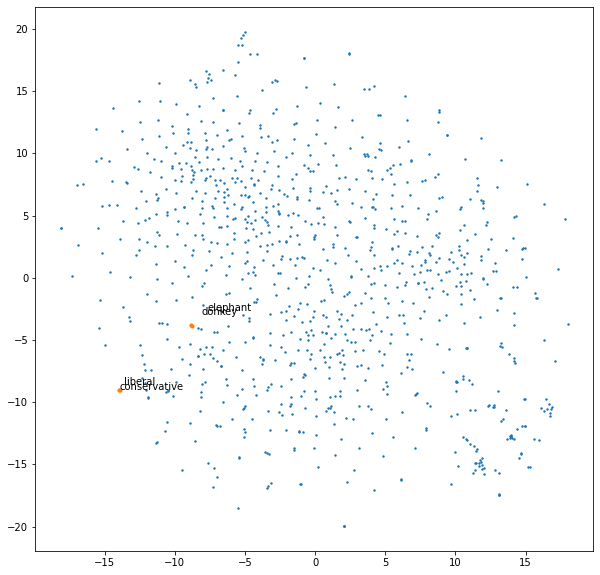

The list of input words was: ['conservative', 'liberal', 'donkey', 'elephant']
I find it interesting that liberal and conservative are very close
together while donkey and elephant are very close together in the model. 
This is because while a human may know that the elephant is the symbol of
the GOP, this is difficult for a computer to know without political context,
and it instead classifies the elephant as an animal rather than a symbol.


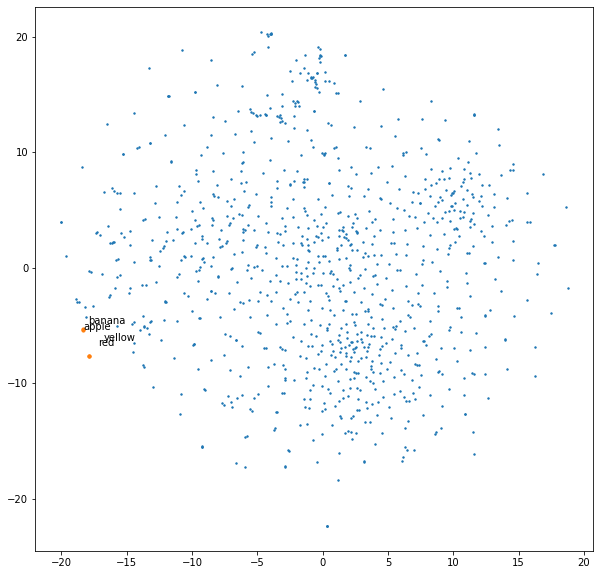

The list of input words was: ['apple', 'banana', 'red', 'yellow']
I was suprised that apple was so far away from banana, red, and yellow.
I was expecting it to be near banana, the other fruit.


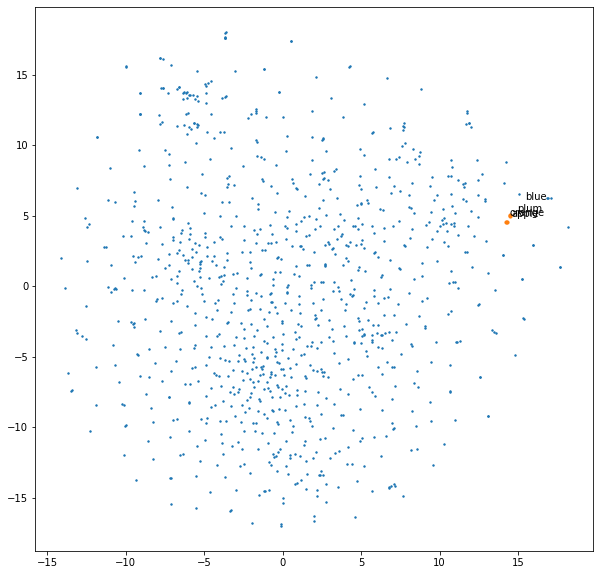

The list of input words was: ['orange', 'apple', 'plum', 'blue']
I was unsuprised that the colors all congregated in the same area
since they are all used similarly in speech


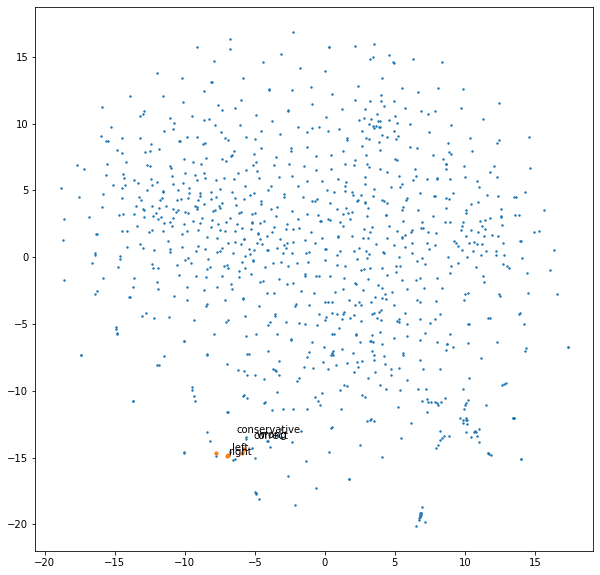

The list of input words was: ['right', 'left', 'correct',
'wrong', 'conservative']
I was expecting right to be close to conservative, but instad, 
conservative was by itself while the other four were clustered together.


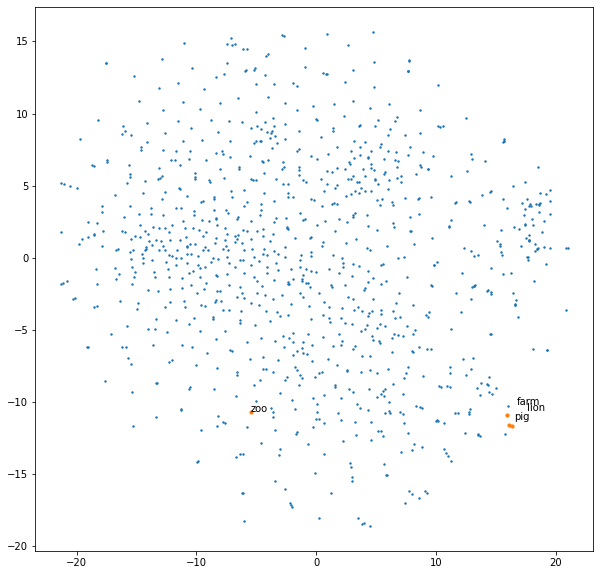

The list of input words was: ['zoo', 'pig', 'farm', 'lion']
I was expecting zoo and farm to be together since they are places while
pig and lion are together because they are animals
Instead, lion was separate from the other three words, which I found suprising.


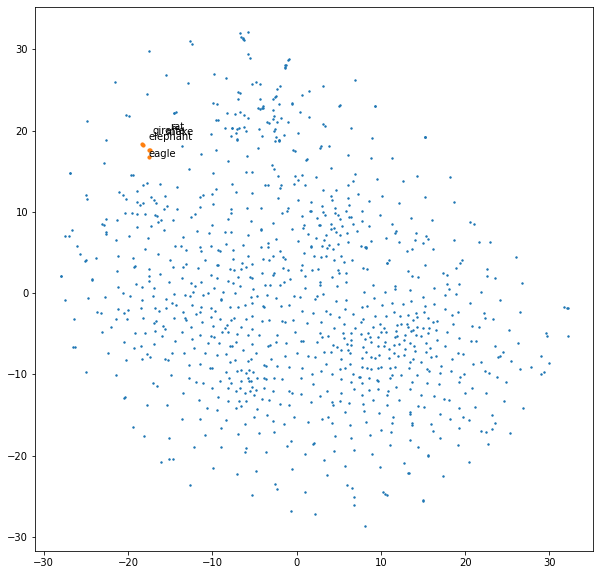

The list of input words was: ['eagle', 'elephant', 'giraffe', 'snake', 'rat']
I was not suprised that all the animals were clustered together because
they are the same type of object.


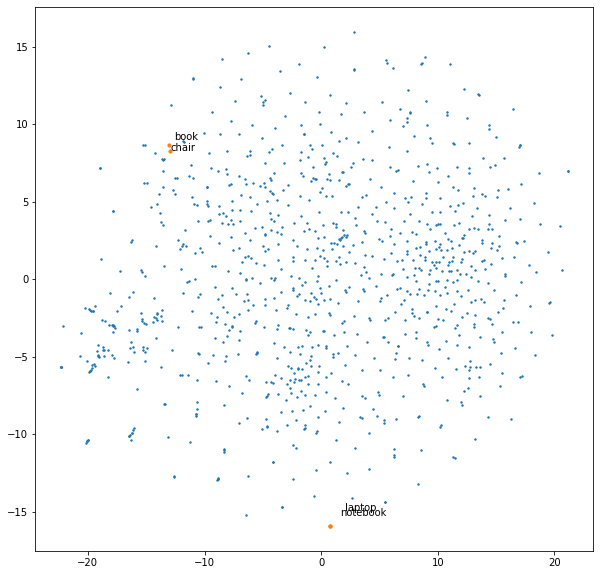

The list of input words was: ['chair', 'book', 'notebook', 'laptop']
I was not suprised that chair and book are farther away while notebook and
laptop are very close since these are both used exclusively for work.




In [ ]:
#Example
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['conservative', 'liberal', 'donkey', 'elephant'])

print ("The list of input words was: ['conservative', 'liberal', 'donkey', 'elephant']")
print ('I find it interesting that liberal and conservative are very close')
print ('together while donkey and elephant are very close together in the model. ')
print ('This is because while a human may know that the elephant is the symbol of')
print ('the GOP, this is difficult for a computer to know without political context,')
print ('and it instead classifies the elephant as an animal rather than a symbol.')

#1
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['apple', 'banana', 'red', 'yellow'])

print ("The list of input words was: ['apple', 'banana', 'red', 'yellow']")
print ('I was suprised that apple was so far away from banana, red, and yellow.')
print ('I was expecting it to be near banana, the other fruit.')
#2
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['orange', 'apple', 'plum', 'blue'])

print ("The list of input words was: ['orange', 'apple', 'plum', 'blue']")
print ('I was unsuprised that the colors all congregated in the same area')
print ('since they are all used similarly in speech')

#3
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word =
                          ['right', 'left', 'correct', 'wrong', 'conservative'])

print ("The list of input words was: ['right', 'left', 'correct',")
print ("'wrong', 'conservative']")
print ('I was expecting right to be close to conservative, but instad, ')
print ('conservative was by itself while the other four were clustered together.')

#4
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['zoo', 'pig', 'farm', 'lion'])

print ("The list of input words was: ['zoo', 'pig', 'farm', 'lion']")
print ('I was expecting zoo and farm to be together since they are places while')
print ('pig and lion are together because they are animals')
print ('Instead, lion was separate from the other three words, which I found suprising.')

#5
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['eagle', 'elephant', 'giraffe', 'snake', 'rat'])

print ("The list of input words was: ['eagle', 'elephant', 'giraffe', 'snake', 'rat']")
print ('I was not suprised that all the animals were clustered together because')
print ('they are the same type of object.')

#6
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['chair', 'book', 'notebook', 'laptop'])

print ("The list of input words was: ['chair', 'book', 'notebook', 'laptop']")
print ('I was not suprised that chair and book are farther away while notebook and')
print ('laptop are very close since these are both used exclusively for work.')

print ()
print ()



### Problem  3: Experiments with Musician Embeddings (15 points)


In this problem, we will use a collection of playlists obtained from [last.fm](http://last.fm). We treat each playlist as a document, and each artist in the playlist as a word. By feeding this dataset to word2vec, we will be able to learn artist embeddings.

#### Artist Embeddings

The following experiments will be done with the playlist data file `playlists.txt`. Each line in this file is a playlist. The integers on each line are unique artist identifiers, indicating which artists were in each playlist. The artists are in `artists.txt`.

The code below constructs artist embeddings with word2vec. The artist names are mapped to id numbers in the playlists; the code maps them back to display the names.

In [ ]:
import gensim
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
playlists = word2vec.LineSentence('https://raw.githubusercontent.com/YData123/sds265-fa22/master/assignments/assn4/playlists.txt')
music_model = word2vec.Word2Vec(playlists, size=64, window=100, min_count=10)

In [ ]:
music_model.wv['299']

array([ 0.24947071, -0.35004723,  0.09832823,  0.7301962 ,  0.43788657,
       -0.25319222, -0.16092981,  0.77530026, -0.94533896,  0.08933414,
       -0.0085277 ,  0.4723321 ,  0.24173293,  0.82962567, -0.5395575 ,
       -0.2526739 , -0.6059386 , -1.1726171 ,  0.2187396 ,  0.72159725,
        0.5497359 ,  0.6119349 ,  0.2545262 , -0.2518343 , -0.22980747,
       -0.14683098,  0.55691916, -0.06008076, -0.09704841, -0.3326424 ,
        0.9302474 ,  0.09330507,  0.6655262 ,  0.5738008 , -0.40292072,
       -0.7590747 , -0.05765826,  0.41237187,  0.87579465,  1.0542175 ,
       -0.07882317,  0.4920718 , -0.21459344, -0.38185957,  0.44279444,
       -0.07457295,  0.9803837 , -0.70326525,  0.5553825 , -0.67858607,
       -0.36537892,  0.46775588, -0.21938154,  1.3057603 ,  1.321647  ,
        0.2251287 , -0.15902743,  0.16706058,  0.74153554,  0.32165098,
        0.50408447,  0.30502808, -0.10717829,  0.28712717], dtype=float32)

In [ ]:
from urllib.request import urlopen

artist = []
file = urlopen('https://raw.githubusercontent.com/YData123/sds265-fa22/master/assignments/assn4/artists.txt')
for line in file:
    art = line.decode("utf-8")
    artist.append(art.strip())

artist[0:10]

['Everette Harp',
 'Bishop Paul S. Morton & Aretha Franklin',
 'Frankie Ballard',
 'Herb Alpert',
 'Rod Stewart & Chaka Khan',
 'Scars On 45',
 'New Radicals',
 'Crosby, Stills & Nash',
 'Ledisi',
 'La Quinta Estacion']

In [ ]:
id2name = {}
name2id = {}
for w in range(len(artist)):
    id2name["%s" % w] = artist[w]
    name2id[artist[w]] = "%s" % w

id2name[name2id['Elton John']]

'Elton John'

#### 3.1 Similar artists

Find the 5 closest artist embedding vectors to the artists "The Beatles", "Lady Gaga", and "Nirvana". Comment on the results.

In [ ]:
# Don't change this function
def similar_artists(model, artist, n=5):
    id = name2id[artist]
    out = model.wv.most_similar(id, topn=n)

    print("artists similar to '%s'\n" % artist)
    for i in range(n) :
        name = id2name[out[i][0]]
        print("\t%s" % name)

similar_artists(music_model, 'Aerosmith')

artists similar to 'Aerosmith'

	Billy Idol
	The Jimi Hendrix Experience
	The Black Crowes
	Boston
	Def Leppard


In [ ]:
# your code and markdown here
similar_artists(music_model, 'The Beatles')
similar_artists(music_model, 'Lady Gaga')
similar_artists(music_model, 'Nirvana')

artists similar to 'The Beatles'

	Steppenwolf
	The Electric Light Orchestra
	Creedence Clearwater Revival
	Grand Funk Railroad
	The Kinks
artists similar to 'Lady Gaga'

	Bruno Mars
	Katy Perry
	Ke$ha
	Black Eyed Peas
	Taio Cruz
artists similar to 'Nirvana'

	Temple Of The Dog
	Stone Temple Pilots
	Faith No More
	Audioslave
	Pearl Jam


It makes sense that classic rock bands are chosen as similar to "The Beatles", top pop musicians of the last 10 years are considered similar to Lady Gaga, and Nirvana centers upon artists from the 80s/90s.

#### 3.2 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize the artist embeddings. After running t-SNE on the artist embeddings, try visualizing  "The Temptations" and "The Supremes" together. Find a few more examples that you think are interesting and include the plots in your write-up. Comment on your findings.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_artists(model, artists, nsample=1000, size1=2, size2=10, offset=5):

    arr = np.empty((0,64), dtype='f')

    # add the vector for each of the closest words to the array
    for a in range(len(artists)):
        id = name2id[artists[a]]
        arr = np.append(arr, np.array([model[id]]), axis=0)

    voc = [w for w in model.wv.vocab]
    ids = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in ids:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(artists)], y_coord[0:len(artists)],s=size2)

    # label the input words
    for w in range(len(artists)):
        plt.annotate(artists[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

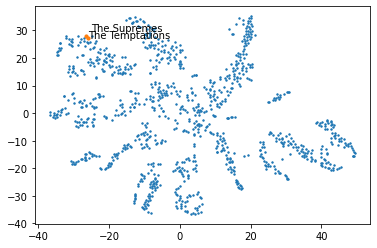

In this plot I am comparing The Supremes and The Temptations.
Since these are both classic rock bands, they have vectors that
are very graphically close to each other


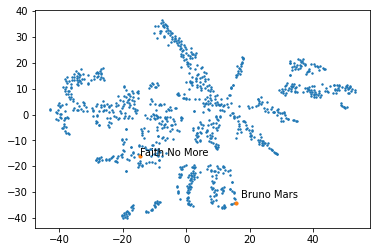

In this plot I am comparing Faith No More and Bruno Mars.
Since Faith No More is a rock band started in the 1980s and Bruno Mars
is a pop/funk/R&B artist they have dramatically different
musical vectors, as shown graphically


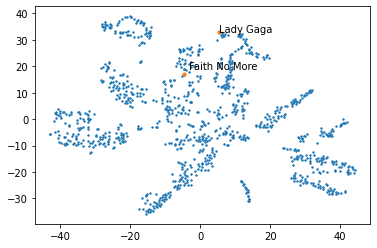

In this plot I am comparing Lady Gaga and Faith No More. There is a
clear separation between the two artists,
similar to the example with Bruno Mars above.


In [ ]:
# your code and markdown here
display_tsne_artists(music_model, ['The Temptations','The Supremes'])
print ('In this plot I am comparing The Supremes and The Temptations.')
print ('Since these are both classic rock bands, they have vectors that')
print ('are very graphically close to each other')

display_tsne_artists(music_model, ['Faith No More','Bruno Mars'])
print ('In this plot I am comparing Faith No More and Bruno Mars.')
print ('Since Faith No More is a rock band started in the 1980s and Bruno Mars')
print ('is a pop/funk/R&B artist they have dramatically different')
print ('musical vectors, as shown graphically')

display_tsne_artists(music_model, ['Lady Gaga','Faith No More'])
print ('In this plot I am comparing Lady Gaga and Faith No More. There is a')
print ('clear separation between the two artists,')
print ('similar to the example with Bruno Mars above.')